# Netflix Analysis

Questions ww'll be answering
1.Which subscription plan (monthly, quarterly, yearly) is the most purchased?
2.What is the most common watching time (day, night, afternoon)?
3.What percentage of users continue their membership after the trial period?


In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
import seaborn as sns
import matplotlib.pyplot as plt
pio.templates.default="plotly_white"

In [2]:
#load and read file 
df_netflix=pd.read_csv('./netflix_userbase.csv')
df_netflix.reset_index(drop=True, inplace=True)
df_netflix.head()


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [3]:
df_netflix.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [4]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [5]:
# converting to date time

df_netflix['Join Date']=pd.to_datetime(df_netflix['Join Date'])
df_netflix['Last Payment Date']=pd.to_datetime(df_netflix['Last Payment Date'])
df_netflix.info()


C:\Users\mohin\AppData\Local\Temp\ipykernel_21784\993859891.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_netflix['Join Date']=pd.to_datetime(df_netflix['Join Date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


C:\Users\mohin\AppData\Local\Temp\ipykernel_21784\993859891.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_netflix['Last Payment Date']=pd.to_datetime(df_netflix['Last Payment Date'])


In [6]:
# missing values
df_netflix.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [7]:
df_netflix.rename(columns={'User ID': 'user_id', 'Subscription Type': 'subscription_type', 'Monthly Revenue': 
                           'monthly_revenue', 'Join Date': 'join_date', 'Last Payment Date': 'last_payment_date',
                           'Country': 'country', 'Age': 'age', 'Gender': 'gender', 'Device': 'device', 
                           'Plan Duration': 'plan_duration'}, inplace=True)
df_netflix.columns

Index(['user_id', 'subscription_type', 'monthly_revenue', 'join_date',
       'last_payment_date', 'country', 'age', 'gender', 'device',
       'plan_duration'],
      dtype='object')

# outliers

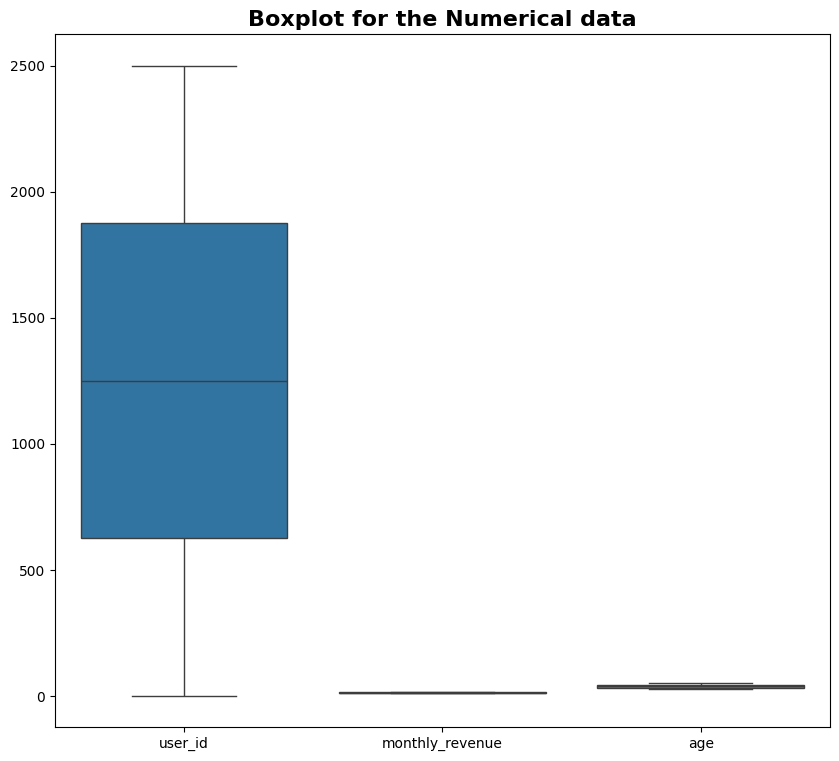

In [8]:
plt.figure(figsize=(10, 9))
sns.boxplot(df_netflix)
plt.title("Boxplot for the Numerical data", fontsize=16, fontweight='bold')
plt.show()

In [9]:
df_netflix['subscribe_duration']=df_netflix['last_payment_date'] - df_netflix['join_date']
df_netflix['subscribe_duration'] = df_netflix['subscribe_duration'].dt.days
df_netflix.head(25)

,user_id,subscription_type,monthly_revenue,join_date,last_payment_date,country,age,gender,device,plan_duration,subscribe_duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,629
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,774
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,262
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,174
5,6,Premium,15,2022-03-18,2023-06-27,France,29,Female,Smart TV,1 Month,466
6,7,Standard,12,2021-09-12,2023-06-25,Brazil,46,Male,Tablet,1 Month,651
7,8,Basic,10,2023-02-04,2023-06-24,Mexico,39,Female,Laptop,1 Month,140
8,9,Standard,12,2022-10-20,2023-06-23,Spain,37,Male,Smartphone,1 Month,246
9,10,Premium,15,2023-07-01,2023-06-22,Italy,44,Female,Smart TV,1 Month,-9


In [10]:
df_netflix['start_month'] = df_netflix['join_date'].dt.month
df_netflix['start_month'].head(25)

0      1
1      5
2      2
3     10
4      1
5      3
6      9
7      2
8     10
9      7
10     5
11     3
12    11
13     1
14     9
15     7
16     1
17    10
18     2
19     5
20    10
21     7
22     5
23     3
24     3
Name: start_month, dtype: int32

In [11]:
# Customer Lifetime Value (clv)
df_netflix['clv'] = df_netflix['subscribe_duration'] * df_netflix['monthly_revenue']
df_netflix['clv'].head(25)  

0      6290
1     11610
2      1428
3      3144
4      1740
5      6990
6      7812
7      1400
8      2952
9      -135
10     4020
11     1455
12     6888
13     5340
14     -828
15     5370
16     5170
17     7368
18     1920
19      260
20    -1590
21     3410
22     9312
23     5748
24     1060
Name: clv, dtype: int64

### # Monthly Revenue

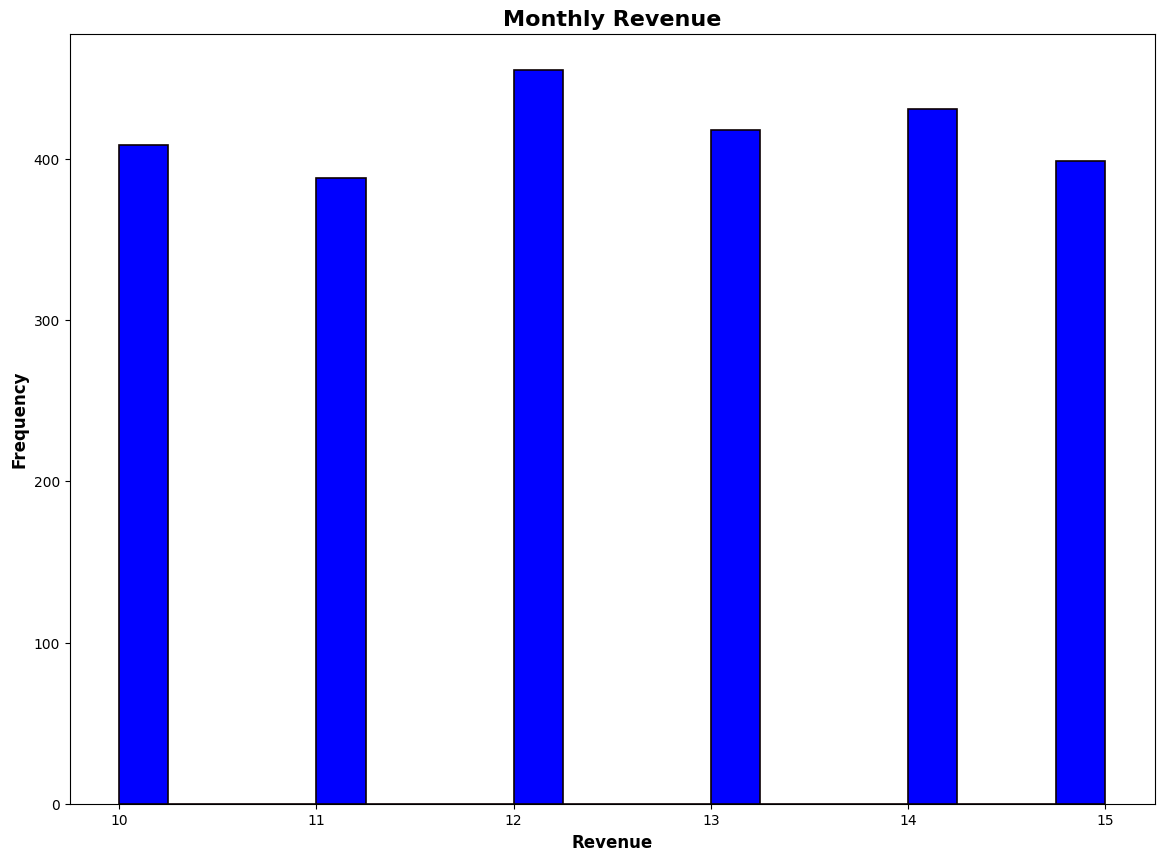

In [12]:
plt.figure(figsize=(14, 10))
plt.hist(df_netflix['monthly_revenue'], bins=20, color='blue', edgecolor='#0d0103', linewidth=1.2)
plt.title("Monthly Revenue", fontsize=16, fontweight='bold')
plt.xlabel("Revenue", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.show()

C:\Users\mohin\AppData\Local\Temp\ipykernel_21784\819867090.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df_netflix, palette=palette)


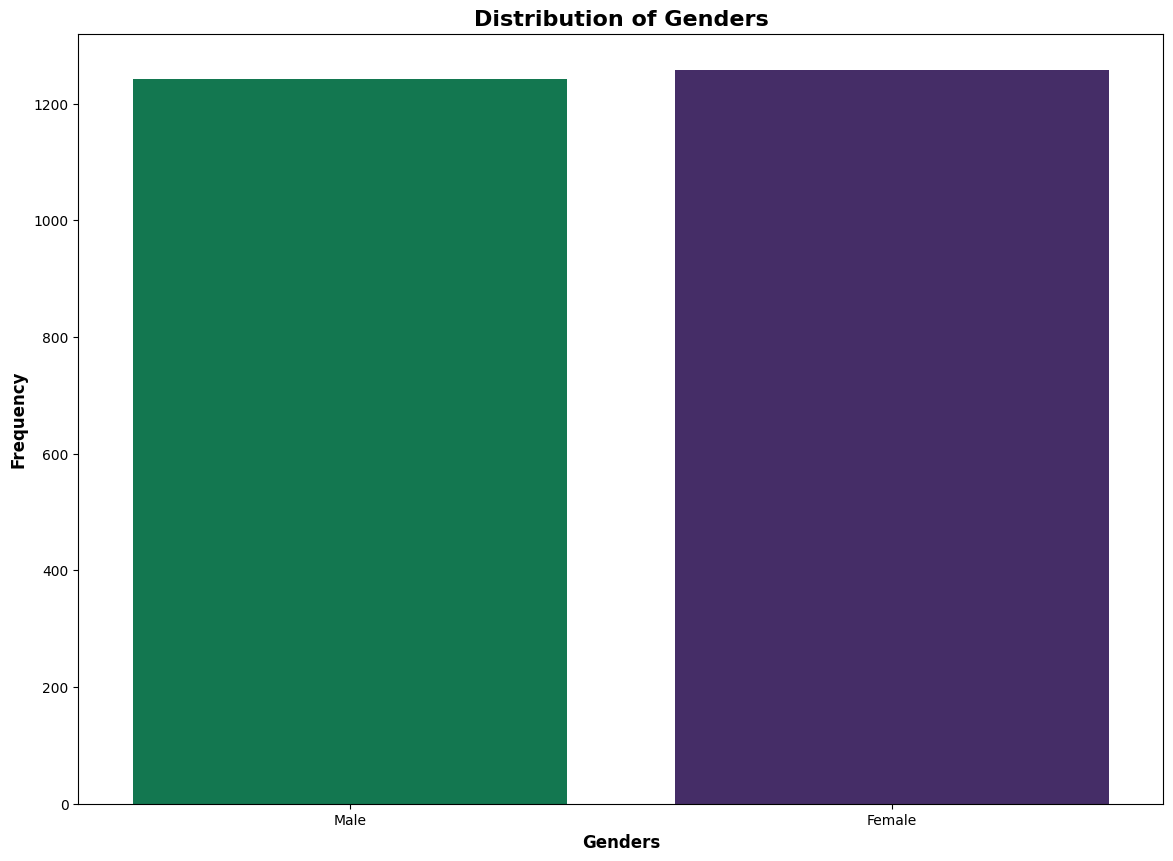

In [13]:
# Gender
plt.figure(figsize=(14, 10))
title = "Distribution of Genders"
palette=['#038754','#432371']

sns.countplot(x='gender', data=df_netflix, palette=palette)
plt.title(title, fontsize=16, fontweight='bold')
plt.xlabel('Genders', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.show()

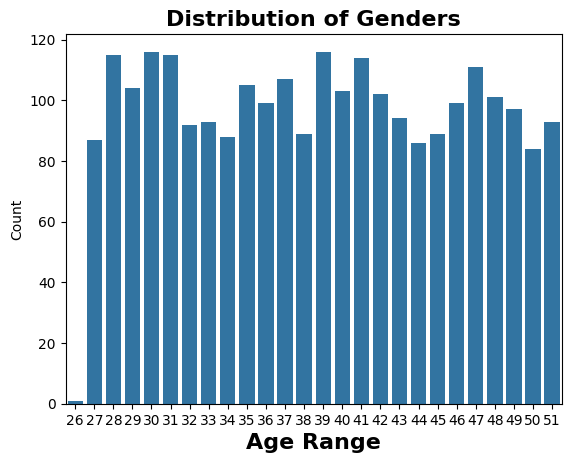

In [14]:
sns.countplot(x='age', data=df_netflix)
plt.title(title, fontsize=16, fontweight='bold')
plt.xlabel('Age Range', fontsize=16, fontweight='bold')
plt.ylabel('Count')
plt.show()

In [15]:
df_netflix['subscription_type'].unique()

array(['Basic', 'Premium', 'Standard'], dtype=object)

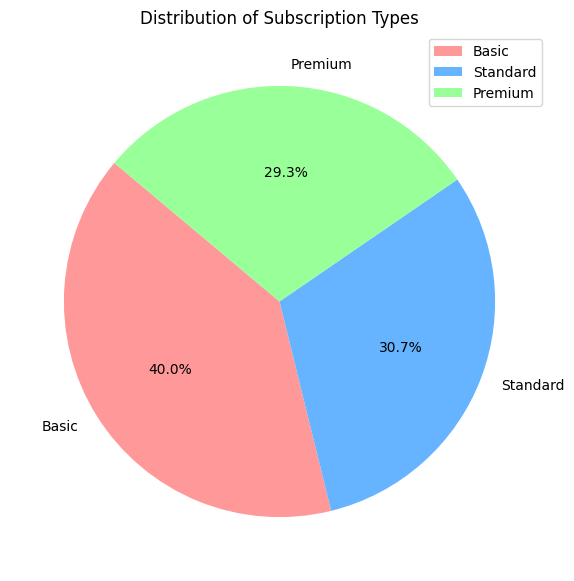

In [16]:

# Count occurrences of each subscription type
subscription_counts = df_netflix['subscription_type'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))  # Set figure size
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])

# Title and display
plt.title('Distribution of Subscription Types')
plt.legend(loc="upper right")
plt.show()


In [17]:
# user_per_country = df_netflix['country'].value_counts()
# user_per_country
df_netflix.shape

(2500, 13)

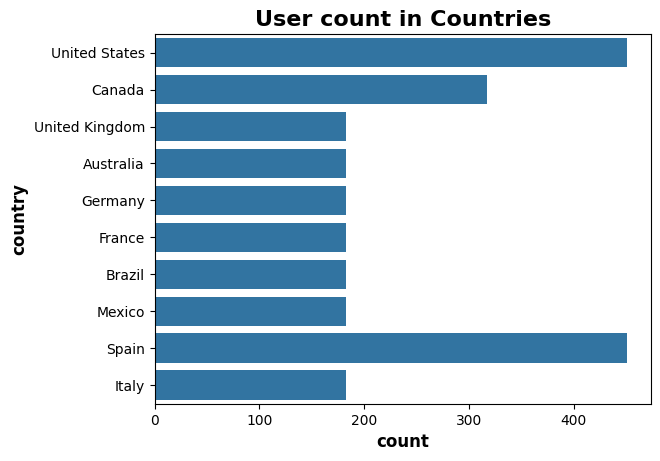

In [18]:
# Count users of each country
sns.countplot(y=df_netflix['country'])
plt.title('User count in Countries', fontsize=16, fontweight='bold')
plt.xlabel('count', fontsize=12, fontweight='bold')
plt.ylabel('country', fontsize=12, fontweight='bold')
plt.show()

In [19]:
subscription_type_byage=df_netflix.groupby('subscription_type')['age'].mean().sort_values()

subscription_type_byage

subscription_type
Premium     38.512960
Basic       38.828829
Standard    39.022135
Name: age, dtype: float64

In [20]:
revenue_by_gender = df_netflix.groupby('gender')['monthly_revenue'].mean().sort_values()
revenue_by_gender

gender
Male      12.497989
Female    12.518695
Name: monthly_revenue, dtype: float64

C:\Users\mohin\AppData\Local\Temp\ipykernel_21784\859452812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='monthly_revenue', data=df_netflix, palette="Blues")


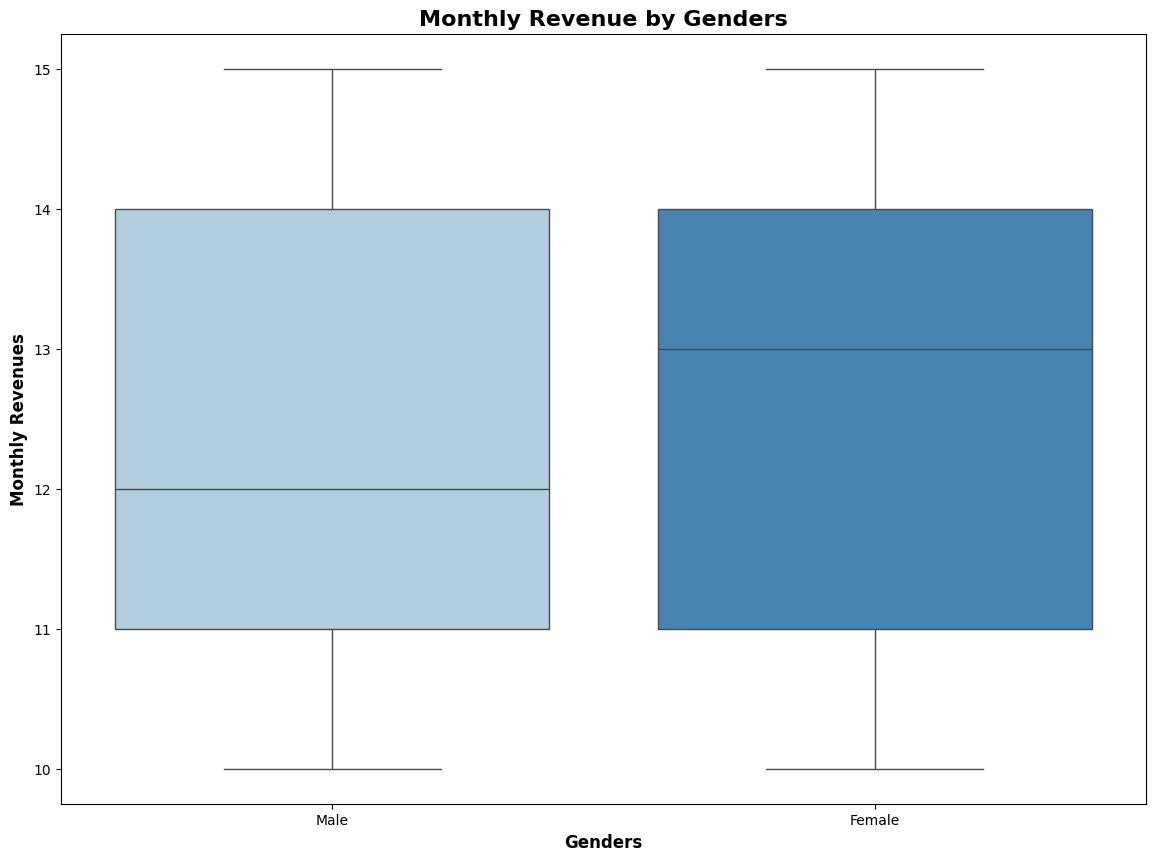

In [21]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='gender', y='monthly_revenue', data=df_netflix, palette="Blues")
plt.title('Monthly Revenue by Genders', fontsize=16, fontweight='bold')
plt.xlabel('Genders', fontsize=12, fontweight='bold')
plt.ylabel('Monthly Revenues', fontsize=12, fontweight='bold')
plt.show()

In [22]:
most_used_device=df_netflix['device'].value_counts()
most_used_device

device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64

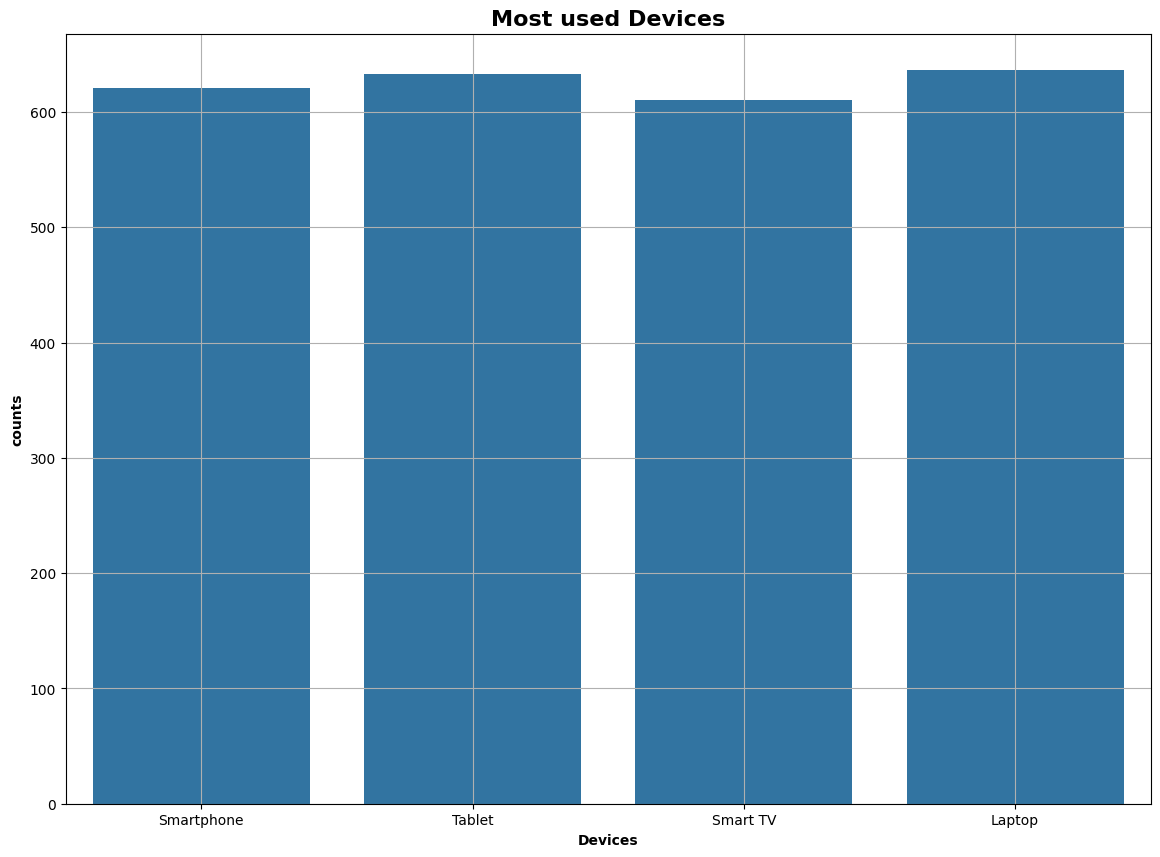

In [23]:
plt.figure(figsize=(14,10))
sns.countplot(x=df_netflix['device'])
plt.title('Most used Devices',fontsize=16,fontweight='bold')
plt.xlabel('Devices',fontsize=10,fontweight='bold')
plt.ylabel('counts',fontsize=10,fontweight='bold')
plt.grid(True)
plt.show()


C:\Users\mohin\AppData\Local\Temp\ipykernel_21784\4169215488.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='monthly_revenue', y='subscription_type', data=df_netflix, palette="Blues")


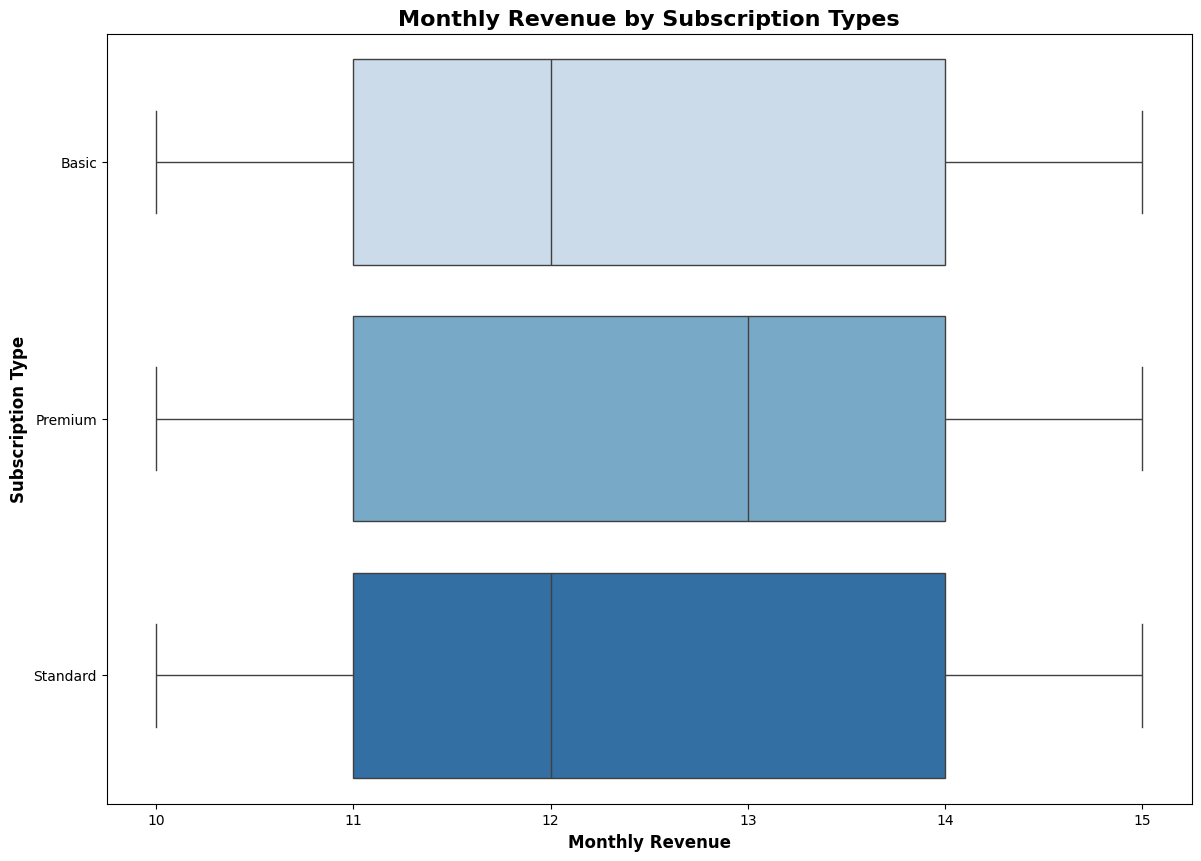

In [ ]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='monthly_revenue', y='subscription_type', data=df_netflix, palette="Blues")
plt.title('Monthly Revenue by Subscription Types', fontsize=16, fontweight='bold')
plt.xlabel('Monthly Revenue', fontsize=12, fontweight='bold')
plt.ylabel('Subscription Type', fontsize=12, fontweight='bold')
plt.show() 